## 2.2.1. Phân loại nhị phân bằng hồi quy logistic

In [65]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')  # hoặc 'darkgrid', 'white', 'ticks'
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [66]:
df = pd.read_csv('Default.csv')
student2 = df.student == 'Yes'
default2 = df.default.factorize()[0]
df.drop(['default','student'], axis=1, inplace=True)
df['student2'] = student2
df['default2'] = default2
df.head(3)

,balance,income,student2,default2
0,729.526495,44361.625074,False,0
1,817.180407,12106.134700,True,0
2,1073.549164,31767.138947,False,0


In [67]:
x = df['balance']
x = x/x.max()
y = df['default2']

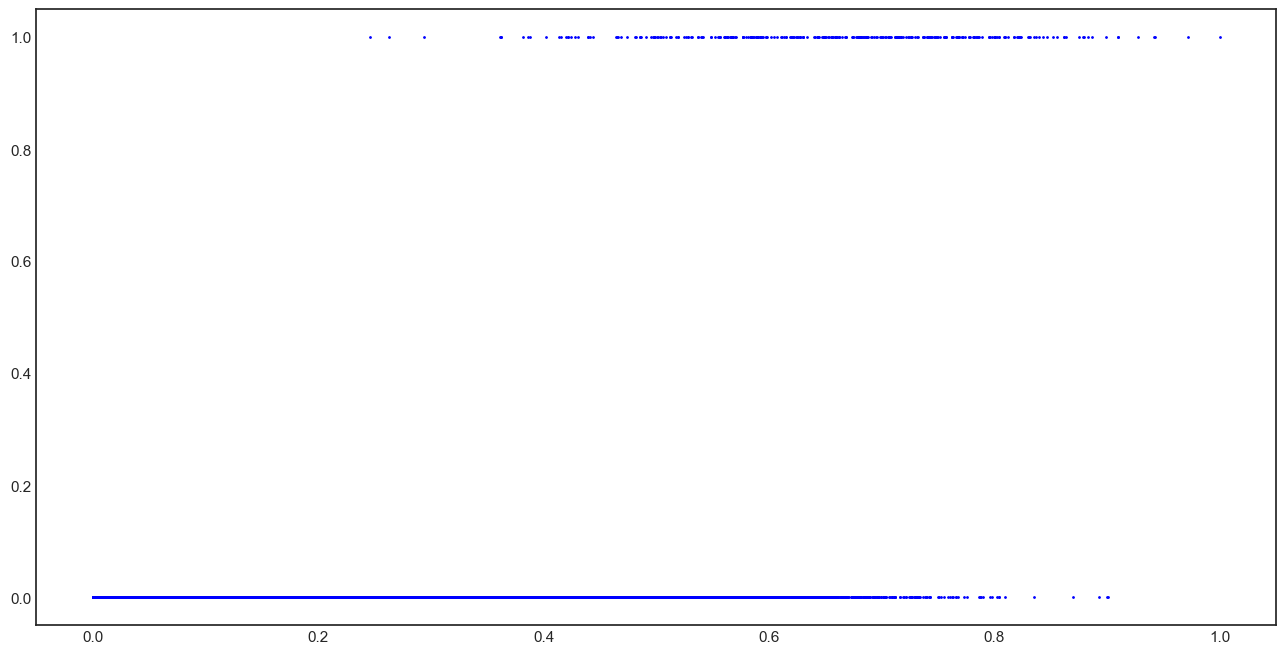

In [68]:
plt.figure(figsize=(16,8))
for i in range(3):
    idx = y==i
    plt.scatter(x[idx], y[idx], c='blue', s=1)
plt.show()

In [69]:
x = x.values.reshape(-1, 1)
x.shape

(10000, 1)

In [70]:
model = LogisticRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_[0])

[-8.80925348]
[11.50214647]


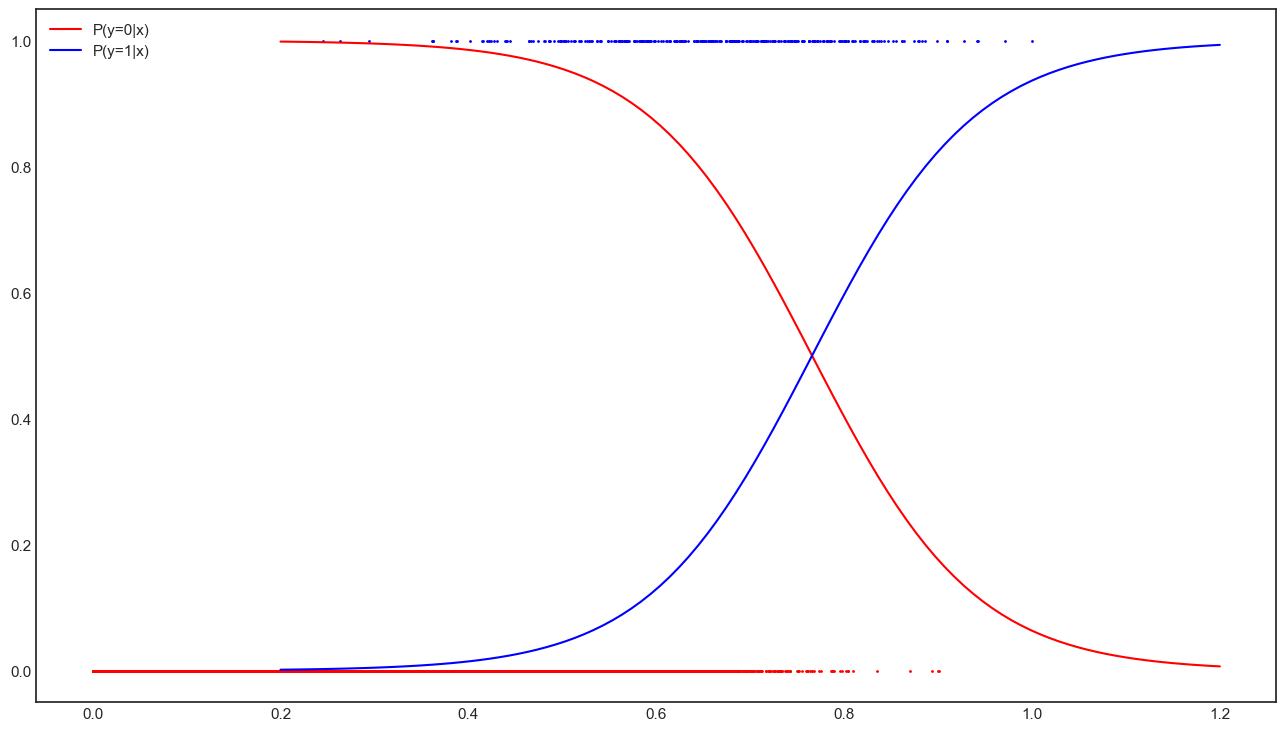

In [71]:
plt.figure(figsize=(16,9))

id0 = y == 0
id1 = y == 1

plt.scatter(x[id0][:,0], y[id0], c='red', s=1)
plt.scatter(x[id1][:,0], y[id1], c='blue', s=1)

xx = np.linspace(0.2, 1.2, 100).reshape(-1, 1)
yy = 1 / (1 + np.exp(model.intercept_ + model.coef_[0][0] * xx))

plt.plot(xx, yy, c='red', label='P(y=0|x)')
plt.plot(xx, 1 - yy, c='blue', label='P(y=1|x)')

plt.legend(loc='best')
plt.show()

In [72]:
y_pred = model.predict(x)

In [73]:
confusion_matrix(y, y_pred)

array([[9647,   20],
       [ 262,   71]], dtype=int64)

<Figure size 800x800 with 0 Axes>

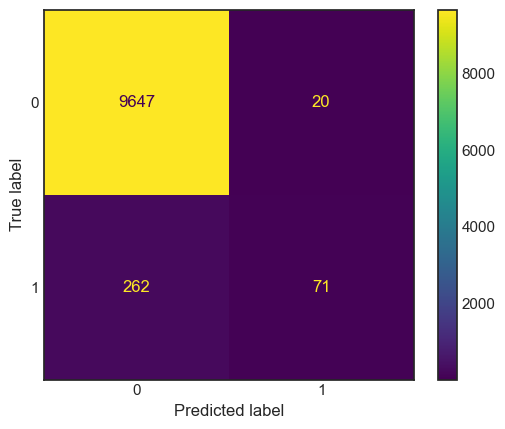

In [74]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(model, x, y)
plt.show()

In [75]:
pred_prob = model.predict_proba(x)

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y, pred_prob[:,1], pos_label=1)

In [77]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y, pred_prob[:,1])
auc_score

0.9479784946837808

In [78]:
# ROC curve for tpr - fpr
random_probs = [0 for _ in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

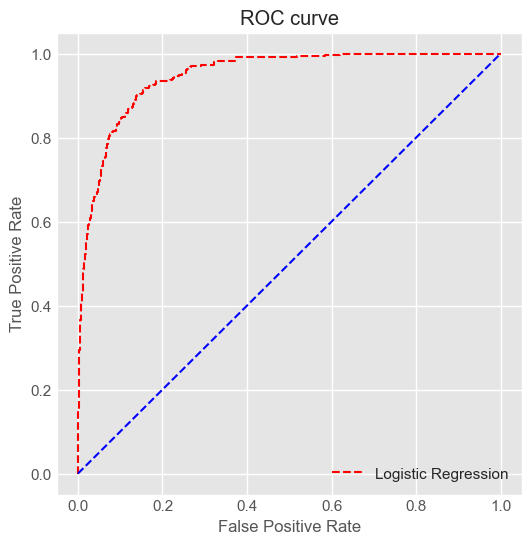

In [79]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(6,6))

# plot roc curves
plt.plot(fpr, tpr, linestyle='--', color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

In [82]:
y_pred_prob = model.predict_proba(x)[:,1]

In [83]:
cut_off = np.linspace(0.1, 1, 10)
cut_off

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [87]:
CM = []
for cutpoint in cut_off:
    y_pred = y_pred_prob > cutpoint
    cm = confusion_matrix(y, y_pred)
    CM.append(cm.flatten())

In [88]:
df = pd.DataFrame(CM, columns=['TP', 'FN', 'FP', 'TN'])
df

,TP,FN,FP,TN
0,9089,578,85,248
1,9436,231,141,192
2,9577,90,195,138
3,9625,42,233,100
4,9647,20,262,71
5,9658,9,293,40
6,9663,4,312,21
7,9664,3,325,8
8,9667,0,331,2
9,9667,0,333,0


In [89]:
df['TPR'] = df['TP'] / (df['TP'] + df['FN'])
df['FPR'] = df['FP'] / (df['FP'] + df['TN'])
df

,TP,FN,FP,TN,TPR,FPR
0,9089,578,85,248,0.940209,0.255255
1,9436,231,141,192,0.976104,0.423423
2,9577,90,195,138,0.990690,0.585586
3,9625,42,233,100,0.995655,0.699700
4,9647,20,262,71,0.997931,0.786787
5,9658,9,293,40,0.999069,0.879880
6,9663,4,312,21,0.999586,0.936937
7,9664,3,325,8,0.999690,0.975976
8,9667,0,331,2,1.000000,0.993994
9,9667,0,333,0,1.000000,1.000000


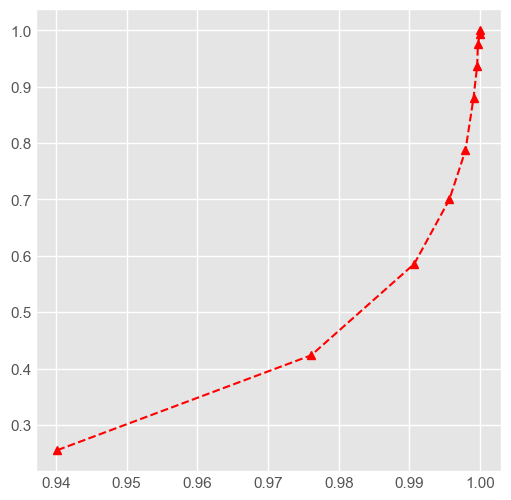

In [96]:
plt.figure(figsize=(6,6))  
plt.plot(df['TPR'], df['FPR'], marker='^', c='red', linestyle='--')  
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [99]:
df = pd.read_csv('Default.csv')
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df = df.drop(['default', 'student'], axis=1)
df.head(3)

,balance,income,default2,student2
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0


In [100]:
X = df[['balance', 'income', 'student2']].values
y = df['default2'].values
print(X.shape, y.shape)

(10000, 3) (10000,)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)
print(model.intercept_, model.coef_)

[-10.68247824] [[ 5.64570310e-03  1.74360822e-07 -6.37896770e-01]]


In [109]:
print(round(model.score(X_train, y_train), 4),
      round(model.score(X_test, y_test), 4))

0.9739 0.9723


In [110]:
p_test=model.predict_proba(X_test)[:,1]
p_train=model.predict_proba(X_train)[:,1]

In [112]:
cut_off=np.linspace(0,1,11)
CM_test=[]
CM_train=[]
for cutpoint in cut_off:
    y_test_pred=p_test>=cutpoint
    y_train_pred=p_train>=cutpoint
    cm=confusion_matrix(y_test, y_test_pred)
    CM_test.append(cm.flatten())
    cm=confusion_matrix(y_train, y_train_pred)
    CM_train.append(cm.flatten())

In [114]:
df_test = pd.DataFrame(CM_test, columns=['TP', 'FN', 'FP', 'TN'])
df_train = pd.DataFrame(CM_train, columns=['TP', 'FN', 'FP', 'TN'])

In [116]:
df_test['TPR'] = df_test['TP'] / (df_test['TP'] + df_test['FN'])
df_test['FPR'] = df_test['FP'] / (df_test['FP'] + df_test['TN'])
df_train['TPR'] = df_train['TP'] / (df_train['TP'] + df_train['FN'])
df_train['FPR'] = df_train['FP'] / (df_train['FP'] + df_train['TN'])


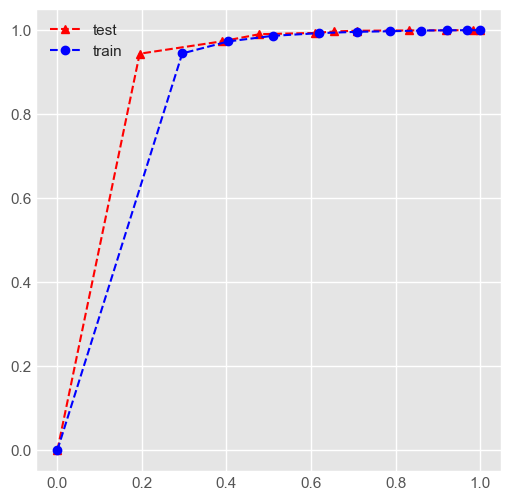

In [117]:
plt.figure(figsize=(6, 6))
plt.plot(df_test['FPR'], df_test['TPR'],
         marker='^', c='red', linestyle='--', label='test')
plt.plot(df_train['FPR'], df_train['TPR'],
         marker='o', c='blue', linestyle='--', label='train')
plt.legend()
plt.show()

# Phương trình hồi quy

In [130]:
# lấy tham số hồi quy
intercept = model.intercept_[0]
coeffs = model.coef_[0]
cols = X.columns

# in ra phương trình hồi quy logistic
print("Phương trình hồi quy logistic:")
print(f"logit(P) = {intercept:.4f} ", end="")
for c, w in zip(cols, coeffs):
    print(f"+ ({w:.4f})*{c} ", end="")
print("\n")


Phương trình hồi quy logistic:
logit(P) = -11.1082 + (0.0058)*balance + (0.0000)*income + (-0.4675)*student2 



## 2.2.2. Phân loại đa lớp bằng hồi quy logistic

In [137]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [138]:
from sklearn.datasets import load_iris, load_wine
X = load_iris().data
y = load_iris().target

In [139]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
for i in range(n_samples):
    for j in range(n_features):
        X[i,j] = X[i,j] + random_state.randn()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.2, random_state=42)

In [141]:
 model = LogisticRegression(multi_class='multinomial')
model.fit(X_train,y_train)
b = model.intercept_
w = model.coef_
print(b)
print(w)

[ 2.98060673  2.02349175 -5.00409848]
[[ 0.14570359  0.84008242 -1.91619159 -0.40885508]
 [-0.19669307 -0.46923679  0.45004096  0.08731467]
 [ 0.05098948 -0.37084563  1.46615063  0.32154041]]


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [142]:
x_test=X_test[0]
z=np.dot(x_test,w.T)+b
print(z)

[-4.03422701  1.81208945  2.22213756]


In [143]:
proba=np.exp(z)/np.sum(np.exp(z))
print(proba)

[0.0011517  0.39844117 0.60040713]


In [144]:
y_train_pred=model.predict(X_train)
print(confusion_matrix(y_train,y_train_pred))

[[39  1  0]
 [ 2 30  9]
 [ 0 11 28]]


<Figure size 800x800 with 0 Axes>

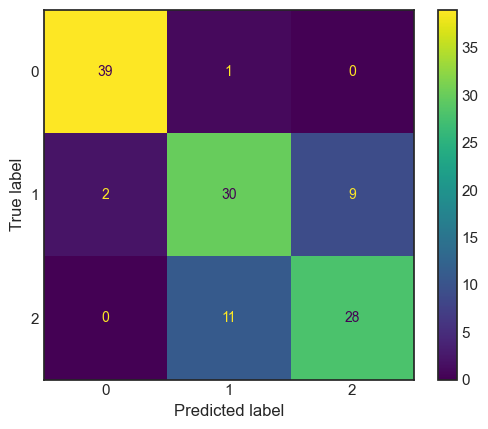

In [145]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)
plt.show()

In [146]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.71      0.73      0.72        41
           2       0.76      0.72      0.74        39

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



In [147]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [148]:
y_train_pred = model.predict_proba(X_train)
y_train_binarize=label_binarize(y_train, classes=[0, 1, 2])

In [149]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# ROC cho từng lớp
for i in range(3):   # vì có 3 lớp trong Iris
    fpr[i], tpr[i], _ = roc_curve(y_train_binarize[:, i], y_train_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC trung bình (micro-average)
fpr["micro"], tpr["micro"], _ = roc_curve(y_train_binarize.ravel(),
                                          y_train_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

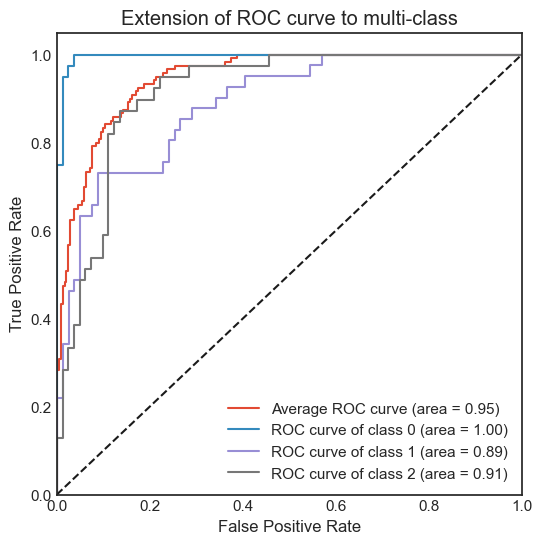

In [150]:
plt.figure(figsize=(6, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of ROC curve to multi-class')
plt.legend(loc="lower right")
plt.show()


In [151]:
y_test_pred = model.predict_proba(X_test)
y_test_binarize=label_binarize(y_test, classes=[0, 1, 2])
#y_train_binarize

In [152]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# ROC cho từng lớp
for i in range(3):   # vì bài toán Iris có 3 lớp
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC trung bình (micro-average)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(),
                                          y_test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

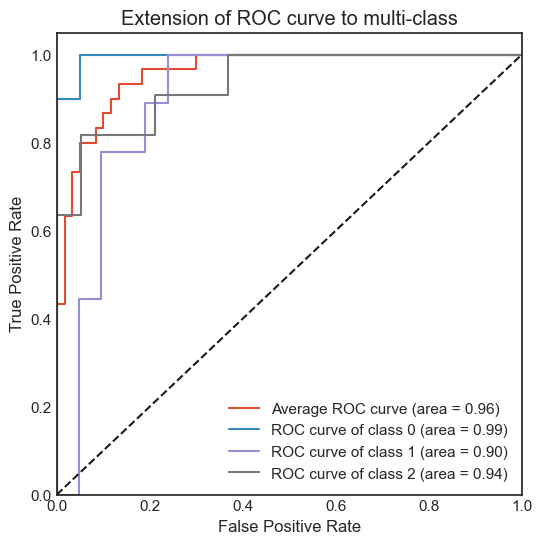

In [153]:
plt.figure(figsize=(6, 6))

# Vẽ đường ROC trung bình (micro-average)
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

# Vẽ ROC cho từng lớp
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Đường chéo tham chiếu
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of ROC curve to multi-class')
plt.legend(loc="lower right")
plt.show()


In [154]:
y_test_pred = model.predict_proba(X_test)
y_test_binarize=label_binarize(y_test, classes=[0, 1, 2])

# Phương trình hồi quy logistic đa lớp

In [159]:
# Lấy hệ số từ model đã fit
intercepts = model.intercept_   # βk0 cho từng lớp
coeffs = model.coef_            # βk cho từng lớp
feature_names = iris.feature_names
target_names = iris.target_names

# In phương trình logit cho từng lớp
for k, class_name in enumerate(target_names):
    eq = f"logit(P(y={class_name})) = {intercepts[k]:.4f} "
    for feature, w in zip(feature_names, coeffs[k]):
        eq += f"+ ({w:.4f})*{feature} "
    print(f"Lớp {k} ({class_name}):")
    print(eq)
    print()

# Giải thích công thức tính xác suất
print(" Xác suất dự đoán lớp k (Softmax):")
print("P(y=k|x) = exp(logit_k) / Σ_j exp(logit_j)")


Lớp 0 (setosa):
logit(P(y=setosa)) = 9.0091 + (-0.3935)*sepal length (cm) + (0.9625)*sepal width (cm) + (-2.3751)*petal length (cm) + (-0.9987)*petal width (cm) 

Lớp 1 (versicolor):
logit(P(y=versicolor)) = 1.8689 + (0.5084)*sepal length (cm) + (-0.2548)*sepal width (cm) + (-0.2130)*petal length (cm) + (-0.7757)*petal width (cm) 

Lớp 2 (virginica):
logit(P(y=virginica)) = -10.8780 + (-0.1150)*sepal length (cm) + (-0.7077)*sepal width (cm) + (2.5881)*petal length (cm) + (1.7745)*petal width (cm) 

 Xác suất dự đoán lớp k (Softmax):
P(y=k|x) = exp(logit_k) / Σ_j exp(logit_j)
